In [1]:
import warnings
warnings.filterwarnings('ignore')


In [73]:
!conda install -c conda-forge matplotlib

Solving environment: ...working... done

# All requested packages already installed.



In [74]:
# Modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import os
import csv
import pandas as pd


In [3]:
# # Read csv file:

# csvpath = os.path.join("..", "SQL Challenge","dataset_HR.csv")

# csvpath

# with open(csvpath) as csvfile:
#     csvreader = csv.reader(csvfile, delimiter=",")

# csvreader

In [4]:
# HR_df = pd.read_csv(csvpath)

# HR_df

In [5]:
# SQL Alchemy
from sqlalchemy import create_engine
import psycopg2

In [6]:
# Create Engine for HR dataset
conn = psycopg2.connect(host="localhost", port = 5433, database="HR_DB", user=, password=)

In [7]:
# Read Dataset File in sql type
HR_df = pd.read_sql(sql="SELECT * FROM dataset_HR", con=conn)

HR_df 

,emp_no,first_name,last_name,birth_date,sex,hire_date,dept_no,dept_name,emp_title,title_name,salary
0,10005,Kyoichi,Maliniak,1955-01-21,M,1989-09-12,d003,Human Resources,s0001,Staff,78228
1,10010,Duangkaew,Piveteau,1963-06-01,F,1989-08-24,d006,Quality Management,e0002,Engineer,72488
2,10010,Duangkaew,Piveteau,1963-06-01,F,1989-08-24,d004,Production,e0002,Engineer,72488
3,10011,Mary,Sluis,1953-11-07,F,1990-01-22,d009,Customer Service,s0001,Staff,42365
4,10035,Alain,Chappelet,1953-02-08,M,1988-09-05,d004,Production,e0003,Senior Engineer,41538
...,...,...,...,...,...,...,...,...,...,...,...
331598,499948,Cordelia,Paludetto,1953-05-24,M,1993-01-28,d004,Production,e0002,Engineer,40000
331599,499972,Katsuo,Leuchs,1957-07-25,F,1989-11-23,d005,Development,e0003,Senior Engineer,41002
331600,499985,Gila,Lukaszewicz,1964-12-26,M,1997-02-11,d008,Research,s0001,Staff,40000
331601,499987,Rimli,Dusink,1961-09-05,F,1998-09-20,d007,Sales,s0001,Staff,52282


# Graphs

In [18]:
x_data = HR_df["salary"]


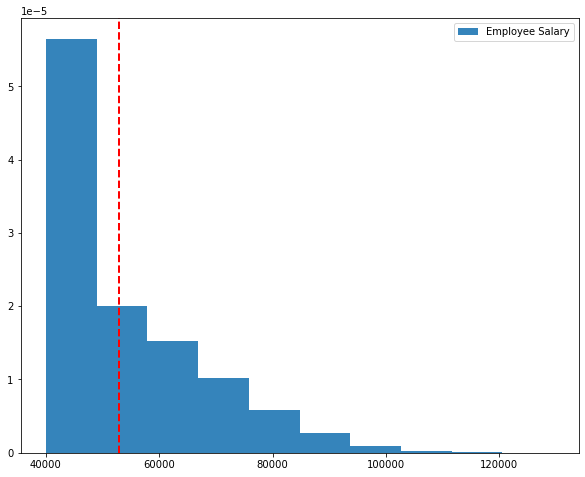

NormaltestResult(statistic=75.29532309577279, pvalue=4.4650706309823555e-17)


In [142]:
# Plotting Histogram graph

plt.figure(figsize=(10,8))
plt.hist(x_data, density=True, alpha=0.9, label="Employee Salary")
    
plt.axvline(x_data.mean(), color='r', linestyle='dashed', linewidth=2)
plt.legend()  
plt.show() 

print(stats.normaltest(x_data.sample(500)))

In [76]:
# Calculating mean salary per title position

x_pertitle = round(HR_df.groupby(["title_name"]).mean()["salary"],2)

x_pertitle

title_name
Assistant Engineer    48615.07
Engineer              48533.34
Manager               51531.04
Senior Engineer       48505.71
Senior Staff          58557.39
Staff                 58460.05
Technique Leader      48574.32
Name: salary, dtype: float64

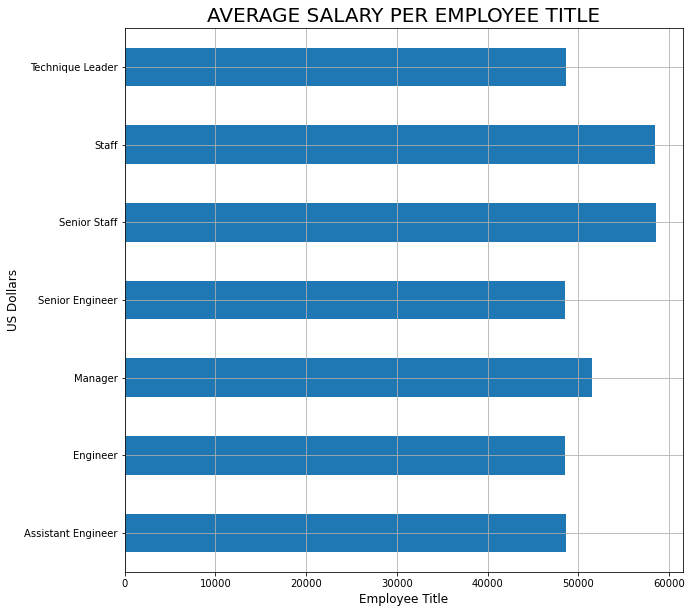

In [146]:
# Plotting bar graph  for mean salary per position title

x_pertitle.plot(kind="barh", figsize=(10,10), align="center", rot = 0)

# Set a title for the chart
plt.title("AVERAGE SALARY PER EMPLOYEE TITLE", fontsize = 20)
plt.xlabel("Employee Title", fontsize = 12)
plt.ylabel("US Dollars", fontsize = 12)

plt.grid()
plt.show()


# Statistical Summary

In [ ]:
x = HR_df["title_name"]
y = HR_df["birth_date"]
x_data = HR_df["salary"]

In [64]:
mean_salary = round(np.mean(x_data),0)
print(f"The mean salary is {mean_salary}")

median_salary = round(np.median(x_data),0)
print(f"The median salary  is: {median_salary}")

mode_scipy = stats.mode(x_data)
print(f"The mode salary is: {mode_scipy}")
var_salary = round(np.var(x_data,ddof = 0),0)
print(f"The population variance using the NumPy module is: {var_salary}")

sd_numpy = round(np.std(x_data,ddof = 0),0)
print(f"The population standard deviation using the NumPy module is: {sd_numpy}")

The mean salary is 52972.0
The median salary  is: 48691.0
The mode salary is: ModeResult(mode=array([40000], dtype=int64), count=array([105316]))
The population variance using the NumPy module is: 204460870.0
The population standard deviation using the NumPy module is: 14299.0


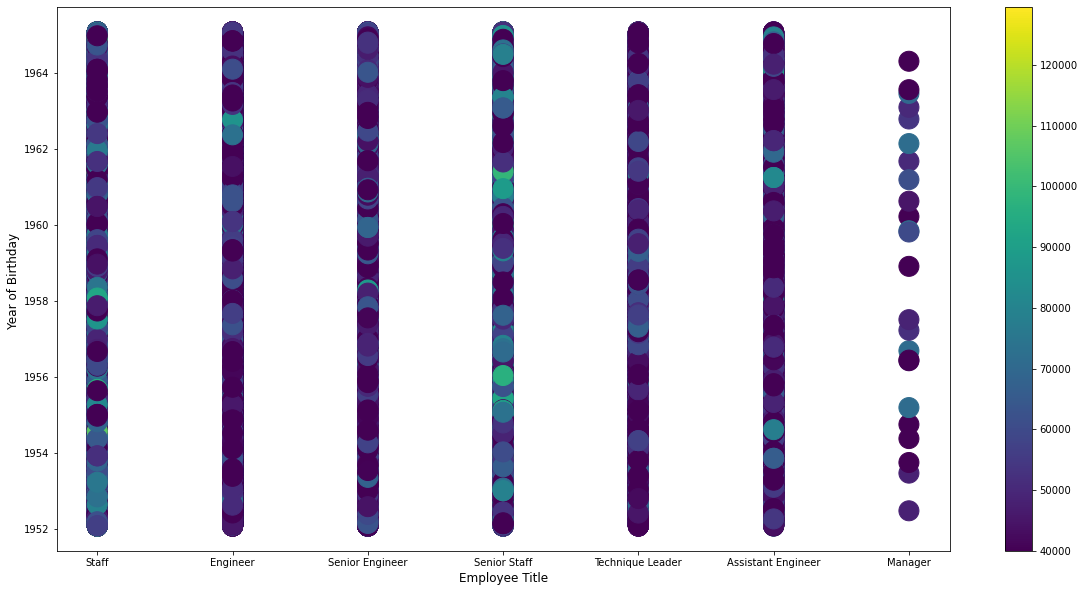

In [93]:
# Ploting Scatter graph

plt.figure(figsize=(20,10))
plt.subplot(1, 1,1)
plt.scatter(x,y,c=y_data, s=400)
clb = plt.colorbar()
plt.xlabel("Employee Title", fontsize = 12)
plt.ylabel("Year of Birthday ", fontsize = 12)

plt.show()

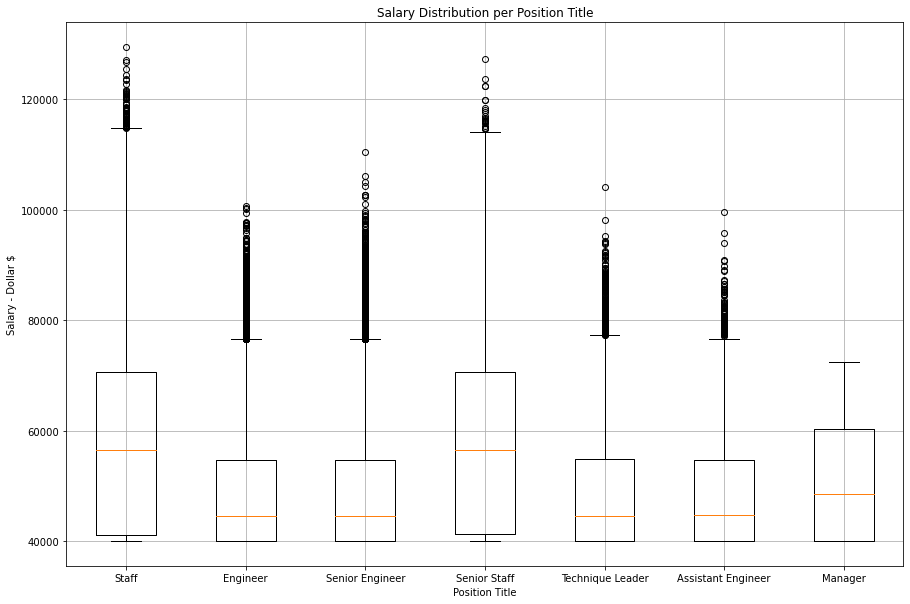

In [136]:
# Generate a box plot of salaries of each title position across the company

x_boxplot = HR_df["title_name"].unique()

y_boxplot = []

for title in x_boxplot:
    
    y_boxplot.append(HR_df.loc[HR_df["title_name"] == title, "salary"]) 


    
fig, axis = plt.subplots(figsize=(15,10))
axis.set_title("Salary Distribution per Position Title")
axis.set_ylabel("Salary - Dollar $")
axis.set_xlabel("Position Title")

axis.boxplot(y_boxplot, labels = x_boxplot)

plt.grid(True)
plt.show()


